<a href="https://colab.research.google.com/github/mrezap/learning_course/blob/main/Dicoding_Lesson_Klastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


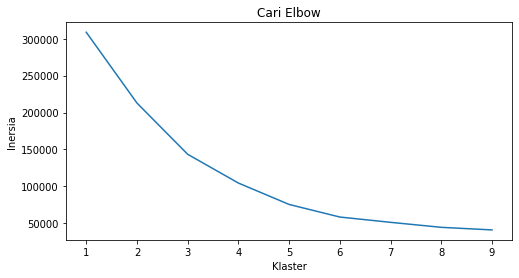

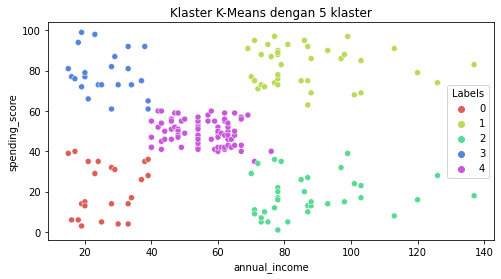

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



data = pd.read_csv('/content/drive/My Drive/Dataset Example/Mall_Customers.csv')
#data.head(5)

# merubah nama kolom
data = data.rename(columns={'Gender': 'gender', 'Age': 'age',
                            'Annual Income (k$)': 'annual_income',
                            'Spending Score (1-100)': 'spending_score'})

# merubah data kategorik menjadi numerik
data['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
data.head(3)

# menghapus atribut/ kolom ID dan gender
X = data.drop(['CustomerID', 'gender'], axis=1)

# membuat list berisi inertia dari nilai K antara 1 - 5
clusters = []
for i in range(1, 10):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

# membuat plot
#%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Klaster')
ax.set_ylabel('Inersia')

# buat objek baru K-Means
km_new = KMeans(n_clusters=5).fit(X)
X['Labels'] = km_new.labels_

# buat plot K-Means dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Klaster K-Means dengan 5 klaster')
plt.show()

